In [1]:
!pip install opencv-python ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, VBox, HBox
from IPython.display import display, clear_output
from google.colab import files
from IPython.display import Image
import requests
from IPython.display import display, clear_output, HTML
import base64
from ipywidgets import HBox, Image
from IPython.display import display
import re

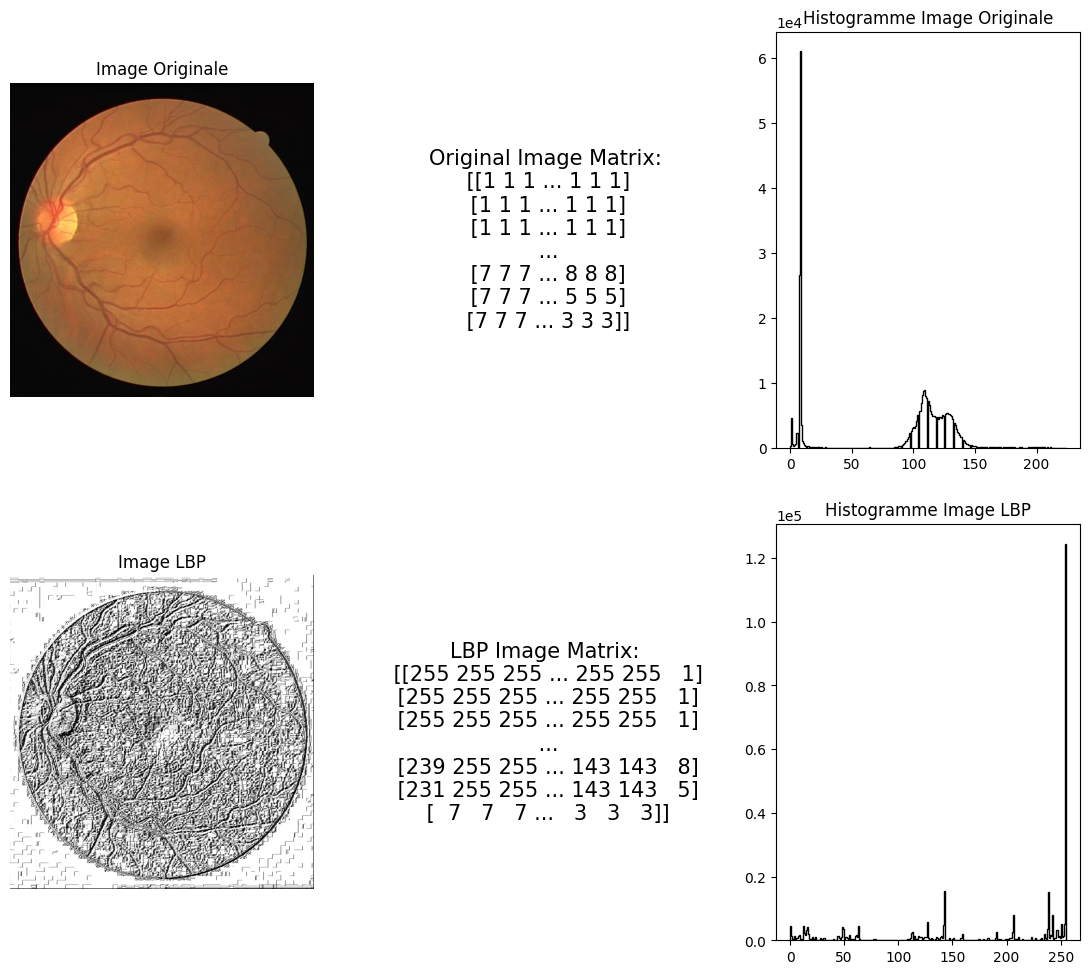

In [3]:
def Calcul_LBP(Img_LBP):
      Img_LBP = cv2.cvtColor(Img_LBP, cv2.COLOR_BGR2GRAY)
      for i in range(0, Img_LBP.shape[0]-1):
        for j in range(0, Img_LBP.shape[1]-1):
          centre = Img_LBP[i][j]
          Code_Binaire = ""
          Code_Binaire += '1' if Img_LBP[i][j+1] >= centre else '0'
          Code_Binaire += '1' if Img_LBP[i+1][j+1] >= centre else '0'
          Code_Binaire += '1' if Img_LBP[i+1][j] >= centre else '0'
          Code_Binaire += '1' if Img_LBP[i+1][j-1]>= centre else '0'
          Code_Binaire += '1' if Img_LBP[i][j-1]>= centre else '0'
          Code_Binaire += '1' if Img_LBP[i-1][j-1]>= centre else '0'
          Code_Binaire += '1' if Img_LBP[i-1][j]>= centre else '0'
          Code_Binaire += '1' if Img_LBP[i-1][j+1]>= centre else '0'
          Img_LBP[i][j] = int(Code_Binaire,2)
      return Img_LBP


def plot_images(org, lbp):
    clear_output(wait=True)
    display_project()
    original_gray = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)

    fig, axs = plt.subplots(2, 3, figsize=(11, 10))

    axs[0, 0].imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Image Originale')
    axs[0, 0].axis('off')

    axs[0, 1].axis('off')
    axs[0, 1].text(0.5, 0.5, f"Original Image Matrix:\n {np.array2string(original_gray, max_line_width=np.inf)}", ha='center', va='center', fontsize=15)

    axs[0, 2].hist(original_gray.ravel(), bins=256, histtype='step', color='black')
    axs[0, 2].ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    axs[0, 2].set_title('Histogramme Image Originale')

    axs[1, 0].imshow(lbp, cmap='gray')
    axs[1, 0].set_title('Image LBP')
    axs[1, 0].axis('off')

    axs[1, 1].axis('off')
    axs[1, 1].text(0.5, 0.5, f"LBP Image Matrix:\n {np.array2string(lbp, max_line_width=np.inf)}", ha='center', va='center', fontsize=15)

    axs[1, 2].hist(lbp.ravel(), bins=256, histtype='step', color='black')
    axs[1, 2].ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    axs[1, 2].set_title('Histogramme Image LBP')

    plt.tight_layout()
    plt.show()

def upload(change):
  clear_output(wait = True)
  uploaded_img = list(change['owner'].value.values())[0]
  img = cv2.imdecode(np.frombuffer(uploaded_img['content'], np.uint8),-1)
  lbp = Calcul_LBP(img)
  plot_images(img,lbp)

def display_project():
    upload_btn = widgets.FileUpload(accept='image/*', multiple=False)
    upload_btn.observe(upload, names='value')
    logo_path = 'http://drive.google.com/uc?export=view&id=1qECtJdVR199gF1TlE95exSXSpxsv6-t_'
    logo_html = f'<img src="{logo_path}" width="100">'
    title = widgets.HTML(value=f"<h2>{logo_html} Analyse par texture LBP (Crée Par Gharbi Safwen CI 1)</h2>")

    display(VBox([title, upload_btn]))


display_project()